In [1]:
# Importamos los packages necesarios 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargamos los dataset necesarios para el trabajo. 
df_demographics = pd.read_csv('data/data_raw/df_final_demo.txt', sep=',')
df_experiment = pd.read_csv('data/data_raw/df_final_experiment_clients.txt', sep=',')

#Carga de las dos partes 
df_webdata1 = pd.read_csv('data/data_raw/df_final_web_data_pt_1.txt', sep=',')
df_webdata2 = pd.read_csv('data/data_raw/df_final_web_data_pt_2.txt', sep=',')

Unimos y exploramos el dataset con la información referente al proceso web de los clientes. 

In [3]:
# Creamo las funcion para juntar los dos dataframes sobre el paso de los clientes en el proceso web.

def merge_dataframes(df1, df2, key='client_id'):
    
    merged_df = pd.merge(df1, df2, how='inner', on=key)

    # Eliminar columnas duplicadas que terminan en '_y'
    cols_to_drop = [col for col in merged_df.columns if col.endswith('_y')]
    merged_df.drop(columns=cols_to_drop, inplace=True)

    # Renombrar columnas que terminan en '_x' eliminando el sufijo
    merged_df.rename(columns={
        col: col.replace('_x', '') for col in merged_df.columns if col.endswith('_x')
    }, inplace=True)
    
    # Eliminar duplicados y ordenar por client_id y date_time
    merged_df = merged_df.drop_duplicates().sort_values(['client_id', 'date_time'])

    return merged_df

# Llamamos a la funcion para hacer el merge de los datos 
df_final_webdata = merge_dataframes(df_webdata1, df_webdata2)

# se guarda en la carpeta files para usarlo en el futuro 
df_final_webdata.to_csv('data/df_final_web_data.txt', index=False)

#Cargamos el dataframe final para comprobar que se ha guardado correctamente. 
df_final_webdata = pd.read_csv('data/df_final_web_data.txt',sep=',')
df_final_webdata.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,1643,910842861_51062379179,379946188_1773022140_107963,start,2017-04-15 15:06:00
1,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:36:07
2,1643,910842861_51062379179,633860590_96880450633_976109,step_1,2017-04-24 06:36:32
3,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:37:17
4,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:38:20
5,1677,361240963_15830034505,494607202_74539107264_966618,start,2017-03-31 10:59:27
6,1677,361240963_15830034505,494607202_74539107264_966618,step_1,2017-03-31 10:59:41
7,1677,361240963_15830034505,494607202_74539107264_966618,step_2,2017-03-31 11:00:40
8,1677,361240963_15830034505,494607202_74539107264_966618,start,2017-03-31 11:01:50
9,1680,262688118_24224945474,807102410_81976926205_767113,start,2017-03-15 09:57:21


In [4]:
df_final_webdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28199 entries, 0 to 28198
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     28199 non-null  int64 
 1   visitor_id    28199 non-null  object
 2   visit_id      28199 non-null  object
 3   process_step  28199 non-null  object
 4   date_time     28199 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
df_final_webdata.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [6]:
print(df_final_webdata['process_step'].value_counts())

process_step
start      12882
step_1      6250
step_2      4228
step_3      2874
confirm     1965
Name: count, dtype: int64


C:\Users\franc\AppData\Local\Temp\ipykernel_13704\410615840.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencias.index, y=frecuencias.values, palette='Blues_d')
C:\Users\franc\AppData\Local\Temp\ipykernel_13704\410615840.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


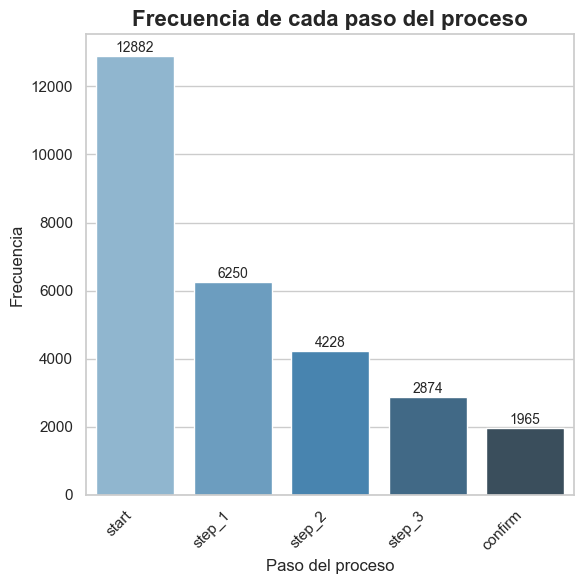

In [7]:
# Estilo general
sns.set(style="whitegrid")

# Contar frecuencia y ordenar
frecuencias = df_final_webdata['process_step'].value_counts()

# Crear figura y ejes
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=frecuencias.index, y=frecuencias.values, palette='Blues_d')

# Títulos y etiquetas
ax.set_title('Frecuencia de cada paso del proceso', fontsize=16, weight='bold')
ax.set_xlabel('Paso del proceso', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

# Rotar etiquetas del eje x para que no se encimen
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar valores sobre cada barra
for i, v in enumerate(frecuencias.values):
    ax.text(i, v + max(frecuencias.values)*0.01, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Teniendo el df del proceso web pasamos a explorar y transformar el df demographics

In [8]:
# Calculamos el porcentaje de valores nulos
null_percentage = df_demographics.isnull().mean().sort_values(ascending=False) * 100

# Formateamos los valores con dos decimales y el símbolo %
null_percentage_formatted = null_percentage.apply(lambda x: f"{x:.2f}%")

print("Porcentaje de valores nulos por columna:")
print(null_percentage_formatted)

Porcentaje de valores nulos por columna:
clnt_age            0.02%
num_accts           0.02%
clnt_tenure_yr      0.02%
clnt_tenure_mnth    0.02%
gendr               0.02%
calls_6_mnth        0.02%
bal                 0.02%
logons_6_mnth       0.02%
client_id           0.00%
dtype: object


In [9]:
def limpiar_demograficos(df):
    # Renombra columnas para mayor claridad
    df = df.rename(columns={
        'clnt_tenure_yr': 'client_tenure_years',
        'clnt_tenure_mnth': 'client_tenure_months',
        'clnt_age': 'age',
        'gendr': 'gender',
        'num_accts': 'number_of_accounts',
        'bal': 'balance',
    })

    # Elimina filas con valores nulos (menos del 0.02% del total)
    df = df.dropna()

    # Normaliza género: reemplaza 'X' por 'U' (Unknown)
    df["gender"] = df["gender"].replace({"X": "U"})

    # Convierte la edad a entero truncado (elimina .5)
    df["age"] = df["age"].astype(int)

    return df


df_demo_clean = limpiar_demograficos(df_demographics)
df_demo_clean.to_csv('data/df_demographic_clean.csv', sep=',',index=False)

In [10]:
df_demo_clean.head(5)

,client_id,client_tenure_years,client_tenure_months,age,gender,number_of_accounts,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0


In [11]:
# Variables numericas 
numerical_vars = df_demo_clean.select_dtypes(include=[np.number]).columns.tolist()
# Variables categoricas
categorical_vars = df_demo_clean.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numerical variables: {numerical_vars}")
print(f"Categorical variables: {categorical_vars}")

Numerical variables: ['client_id', 'client_tenure_years', 'client_tenure_months', 'age', 'number_of_accounts', 'balance', 'calls_6_mnth', 'logons_6_mnth']
Categorical variables: ['gender']


ahora cargamos el dataset de la prertenencia de cada cliente al grupo test o control 

In [12]:
# Verificamos los primeros registros
print(df_experiment.head())
print(df_experiment['Variation'].value_counts())  # Ver grupos: 'control' vs 'experiment'

   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control
Variation
Test       26968
Control    23532
Name: count, dtype: int64


In [13]:
print(df_experiment.columns.tolist())
df_experiment.columns = df_experiment.columns.str.strip()
df_experiment.rename(columns={'Variation': 'group'}, inplace=True)
print(df_experiment.columns)

['client_id', 'Variation']
Index(['client_id', 'group'], dtype='object')


In [14]:
print(df_experiment['group'].value_counts())

group
Test       26968
Control    23532
Name: count, dtype: int64


Analizamos el comportamiento de los clientes

¿quienes son los clientes que utilizan los procesos online? 

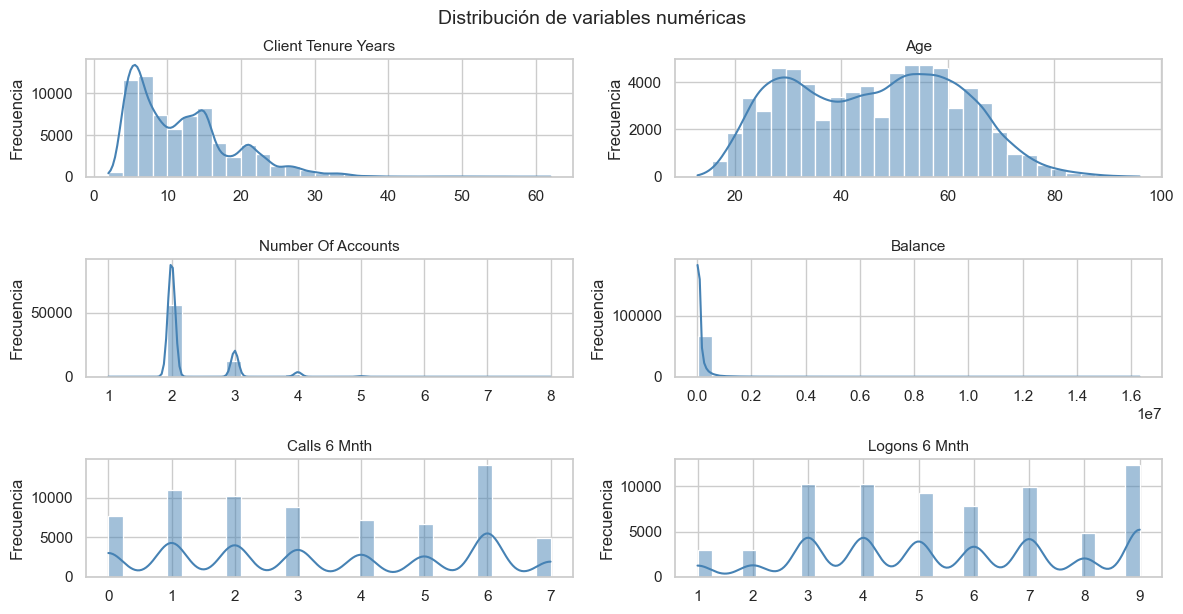

In [15]:
# Columnas a graficar (asegúrate que existen en el df)
cols_to_plot = ['client_tenure_years', 'age', 'number_of_accounts', 'balance', 'calls_6_mnth', 'logons_6_mnth']
cols_to_plot = [col for col in cols_to_plot if col in df_demo_clean.columns]

# Configura el estilo visual
sns.set(style="whitegrid")

# Crear figura general
plt.figure(figsize=(12, 6))

# Iterar y graficar cada histograma
for idx, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 2, idx)
    sns.histplot(df_demo_clean[col], bins=30, kde=True, color='steelblue')
    plt.title(col.replace('_', ' ').title(), fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', fontsize=14, y=1.02)
plt.show()

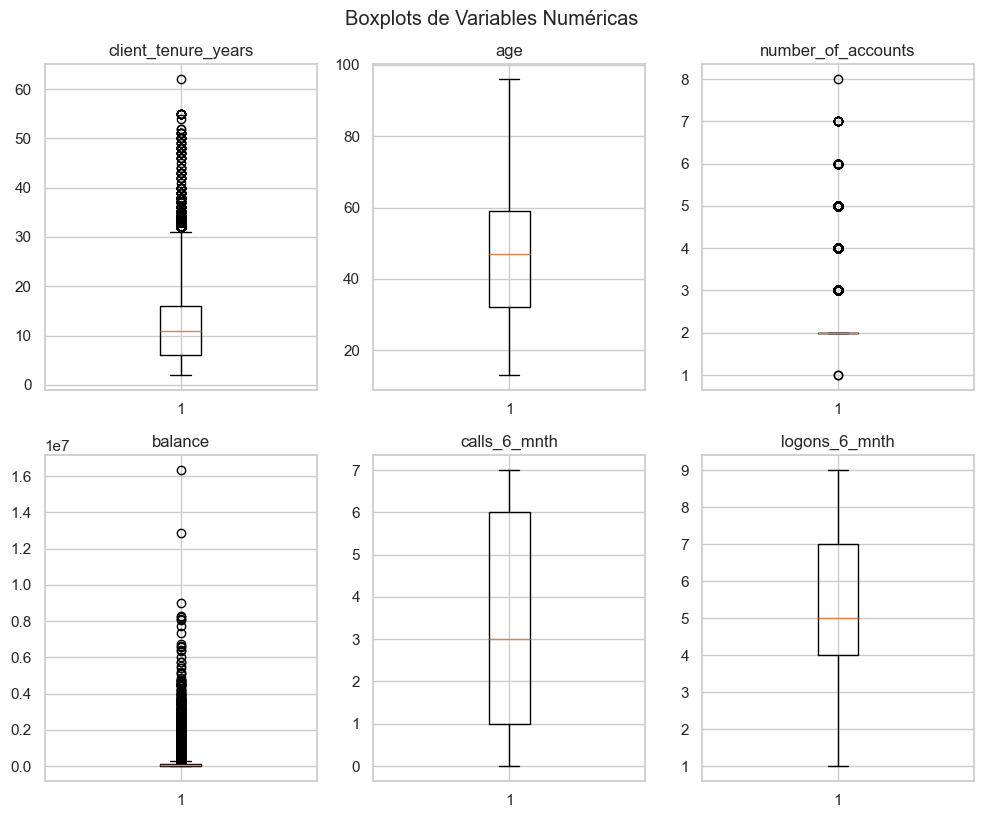

In [16]:
def plot_boxplots(df):
    """
    Genera boxplots para cada columna numérica en el DataFrame proporcionado.
    
    Parameters:
        df (DataFrame): DataFrame que contiene las columnas numéricas.
    """

    # Configurar el tamaño de la figura
    num_columns = df.shape[1]
    num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calcular número de filas necesarias
    plt.figure(figsize=(10, num_rows * 4))  # Ajustar el tamaño en función del número de filas

    # Iterar sobre cada columna y generar un boxplot
    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)  # Cambia el tamaño de la cuadrícula según el número de columnas
        plt.boxplot(df[column].dropna())  # Elimina valores NaN antes de graficar
        plt.title(column)
        plt.grid(True)

    plt.tight_layout()  # Ajustar el espaciado entre los gráficos
    plt.suptitle('Boxplots de Variables Numéricas', y=1.02)  # Ajustar el título para que no se superponga
    plt.show()
    
plot_boxplots(df_demo_clean[cols_to_plot])

In [17]:
# ¿Puede haber periodos de permanencia superiores que la edad del usuario? 
# Si es que si se ve la proporcion  para decidir si eliminar estos datos. 

inconsistentes = (df_demo_clean['client_tenure_years'] > df_demo_clean['age']).sum()
total = len(df_demo_clean)

proporcion = (inconsistentes / total) * 100

print(f"Clientes con permanencia > edad: {inconsistentes} de {total} ({proporcion:.4f}%)")

Clientes con permanencia > edad: 574 de 70594 (0.8131%)


In [18]:
def filtrar_outliers_iqr(df, columnas):

    df_filtrado = df.copy()
    for col in columnas:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_filtrado = df_filtrado[(df_filtrado[col] >= lower) & (df_filtrado[col] <= upper)]
    return df_filtrado


df_demo_iqr = filtrar_outliers_iqr(df_demo_clean, cols_to_plot)
df_demo_iqr.to_csv("data/demographics__clean__iqr.csv",index=False)

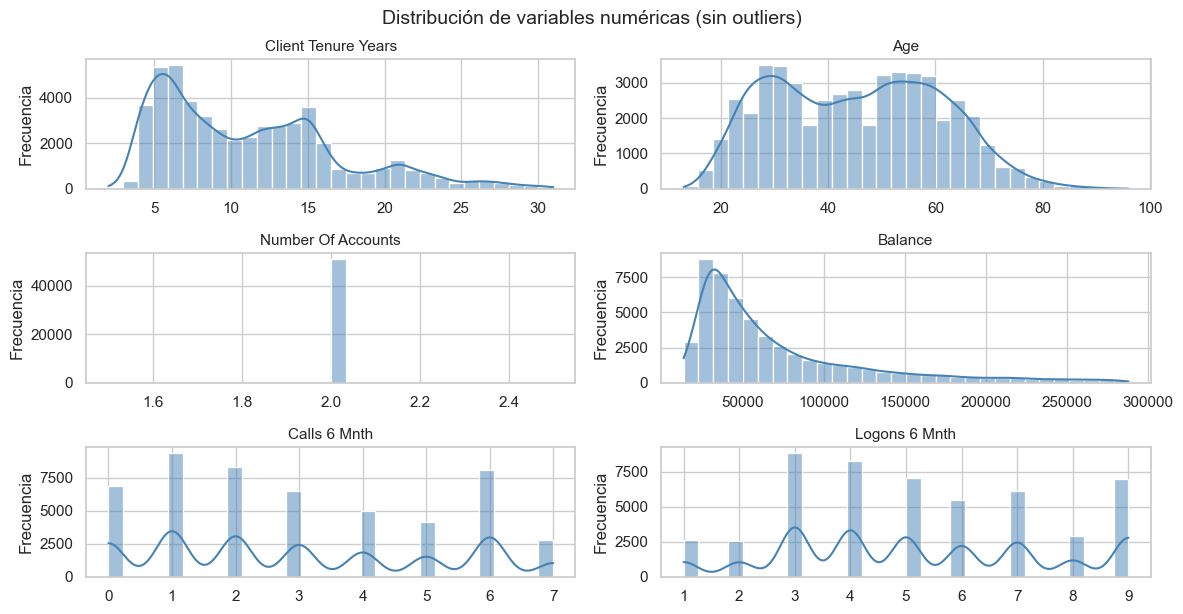

In [19]:
# Columnas a graficar 
cols_to_plot = ['client_tenure_years', 'age', 'number_of_accounts', 'balance', 'calls_6_mnth', 'logons_6_mnth']
cols_to_plot = [col for col in cols_to_plot if col in df_demo_iqr.columns]

# Configura el estilo visual
sns.set(style="whitegrid")

# Crear figura general
plt.figure(figsize=(12, 6))

# Iterar y graficar cada histograma
for idx, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 2, idx)
    sns.histplot(df_demo_iqr[col], bins=30, kde=True, color='steelblue')
    plt.title(col.replace('_', ' ').title(), fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle('Distribución de variables numéricas (sin outliers)', fontsize=14, y=1.02)
plt.show()

Despues de filtar por la muestra mas representativa encontramos las siguientes observciones: 
- Se pueden diferenciar dentro de una misma variable dos grupos como por ejemplo en edad y en permanencia, lo cual nos serviria para obtener los principales clientes diferenciados. 
- Podria darse el caso de identificar segmentos de edad por ejemplo, grupo compendido entrre 20 - 45 años y otro entre 45 - 60 años dentro de ellos podriamos identifacar los principales balances en su cuenta. 
- El otro segmente podria ser entre aqueños con permanencia menor o igual a 10 años y aquellos con una permanencia superior a 10 años. 

Para todo esto primero vamos a crear etiquetas y segmentar los clientes.   

In [24]:
def segmentar_clientes(df):
    df = df.copy()

    # Segmentación balance usando IQR
    Q1 = df['balance'].quantile(0.25)
    Q3 = df['balance'].quantile(0.75)
    bins_balance = [df['balance'].min()-1, Q1, Q3, df['balance'].max()]
    labels_balance = ['Bajo', 'Medio', 'Alto']
    df['segment_balance'] = pd.cut(df['balance'], bins=bins_balance, labels=labels_balance, include_lowest=True)

    # Segmentación tenure usando IQR
    Q1_tenure = df['client_tenure_years'].quantile(0.25)
    Q3_tenure = df['client_tenure_years'].quantile(0.75)
    bins_tenure = [df['client_tenure_years'].min()-1, Q1_tenure, Q3_tenure, df['client_tenure_years'].max()]
    labels_tenure = ['Nuevo', 'Medio', 'Leal']
    df['segment_tenure'] = pd.cut(df['client_tenure_years'], bins=bins_tenure, labels=labels_tenure, include_lowest=True)

    # Segmentación logons usando IQR
    Q1_logons = df['logons_6_mnth'].quantile(0.25)
    Q3_logons = df['logons_6_mnth'].quantile(0.75)
    bins_logons = [df['logons_6_mnth'].min()-1, Q1_logons, Q3_logons, df['logons_6_mnth'].max()]
    labels_logons = ['Inactivo', 'Medio', 'Activo']
    df['segment_logons'] = pd.cut(df['logons_6_mnth'], bins=bins_logons, labels=labels_logons, include_lowest=True)

    # Segmentación edad usando IQR
    Q1_age = df['age'].quantile(0.25)
    Q3_age = df['age'].quantile(0.75)
    bins_age = [df['age'].min()-1, Q1_age, Q3_age, df['age'].max()]
    labels_age = ['Joven', 'Adulto', 'Senior']
    df['segment_age'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, include_lowest=True)

    return df

df_demo_iqr = segmentar_clientes(df_demo_iqr)
df_demo_iqr.head(10)

,client_id,client_tenure_years,client_tenure_months,age,gender,number_of_accounts,balance,calls_6_mnth,logons_6_mnth,segment_balance,segment_tenure,segment_logons,segment_age
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Medio,Nuevo,Activo,Senior
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Alto,Medio,Activo,Adulto
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Medio,Nuevo,Activo,Joven
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Medio,Leal,Medio,Adulto
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Alto,Medio,Inactivo,Adulto
5,3727881,5.0,71.0,30,U,2.0,23915.60,0.0,3.0,Bajo,Nuevo,Inactivo,Joven
6,272934,5.0,66.0,58,U,2.0,27021.42,2.0,5.0,Bajo,Nuevo,Medio,Adulto
10,8368822,8.0,100.0,34,U,2.0,75578.54,0.0,3.0,Medio,Medio,Inactivo,Adulto
11,2537139,8.0,99.0,51,U,2.0,135940.68,6.0,9.0,Alto,Medio,Activo,Adulto
12,2208717,5.0,67.0,33,U,2.0,29782.96,6.0,9.0,Bajo,Nuevo,Activo,Adulto


In [21]:
# Distribución general
edad_total = df_demo_iqr['segment_age'].value_counts(normalize=True)
tenure_total = df_demo_iqr['segment_tenure'].value_counts(normalize=True)
logons_total = df_demo_iqr['segment_logons'].value_counts(normalize=True)
balance_total = df_demo_iqr['segment_balance'].value_counts(normalize=True)

print(f"Tamaño de la muestra: {len(df_demo_iqr)}")
print(f"Porcentaje respecto al total original: {(len(df_demo_iqr) / len(df_demo_clean) * 100):.2f}%")
print('-'*20)
print("Distribución de edad (%):")
print((edad_total * 100).round(2).astype(str) + '%')
print("\nDistribución de permanencia (tenure) (%):")
print((tenure_total * 100).round(2).astype(str) + '%')
print("\nDistribución de logons (%):")
print((logons_total * 100).round(2).astype(str) + '%')
print("\nDistribución de balance (%):")
print((balance_total * 100).round(2).astype(str) + '%')

Tamaño de la muestra: 50911
Porcentaje respecto al total original: 72.12%
--------------------
Distribución de edad (%):
segment_age
Adulto     50.0%
Joven     26.78%
Senior    23.22%
Name: proportion, dtype: object

Distribución de permanencia (tenure) (%):
segment_tenure
Medio    51.21%
Nuevo    29.13%
Leal     19.66%
Name: proportion, dtype: object

Distribución de logons (%):
segment_logons
Medio       53.01%
Inactivo    27.57%
Activo      19.42%
Name: proportion, dtype: object

Distribución de balance (%):
segment_balance
Medio    50.0%
Bajo     25.0%
Alto     25.0%
Name: proportion, dtype: object


In [25]:
def segmentar_clientes_rangos(df):
    df = df.copy()
    rangos_segmentos = {}

    def calcular_segmento(col, etiquetas, nombre_segmento):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        minimo = df[col].min()
        maximo = df[col].max()
        bins = [minimo - 1, Q1, Q3, maximo]
        df[nombre_segmento] = pd.cut(df[col], bins=bins, labels=etiquetas, include_lowest=True)
        # Guardamos los rangos
        rangos_segmentos[nombre_segmento] = [
            {'label': etiquetas[i], 'rango': (round(bins[i], 2), round(bins[i+1], 2))}
            for i in range(len(etiquetas))
        ]

    calcular_segmento('balance', ['Bajo', 'Medio', 'Alto'], 'segment_balance')
    calcular_segmento('client_tenure_years', ['Nuevo', 'Medio', 'Leal'], 'segment_tenure')
    calcular_segmento('logons_6_mnth', ['Inactivo', 'Medio', 'Activo'], 'segment_logons')
    calcular_segmento('age', ['Joven', 'Adulto', 'Senior'], 'segment_age')

    return df, rangos_segmentos


In [26]:
df_demo_iqr, rangos = segmentar_clientes_rangos(df_demo_iqr)

# Imprimir rangos
for segmento, info in rangos.items():
    print(f"\nRangos para {segmento}:")
    for entry in info:
        print(f"  {entry['label']}: {entry['rango'][0]} a {entry['rango'][1]}")



Rangos para segment_balance:
  Bajo: 13790.34 a 33148.27
  Medio: 33148.27 a 88243.84
  Alto: 88243.84 a 287813.68

Rangos para segment_tenure:
  Nuevo: 1.0 a 6.0
  Medio: 6.0 a 15.0
  Leal: 15.0 a 31.0

Rangos para segment_logons:
  Inactivo: 0.0 a 3.0
  Medio: 3.0 a 7.0
  Activo: 7.0 a 9.0

Rangos para segment_age:
  Joven: 12 a 32.0
  Adulto: 32.0 a 58.0
  Senior: 58.0 a 96


In [31]:
def cruzar_segmentos(df, var_fila, var_columna):
    """
    Retorna una tabla cruzada (% por fila) entre dos columnas categóricas.
    Útil para analizar relaciones como edad vs logons, balance vs uso, etc.
    """
    tabla = pd.crosstab(df[var_fila], df[var_columna], normalize='index') * 100
    return tabla.round(2)


In [32]:
cruzar_segmentos(df_segmentado, 'segment_age', 'segment_logons')


segment_logons,Inactivo,Medio,Activo
segment_age,,,
Joven,28.61,51.94,19.45
Adulto,30.46,51.73,17.81
Senior,20.14,56.98,22.88


In [33]:
def formatear_segmentos_tabla(rangos_segmentos, porcentaje_segmentos):
    """
    Devuelve un DataFrame tabular combinando rangos y porcentajes de cada segmento.
    """
    filas = []

    for variable in rangos_segmentos:
        for i, item in enumerate(rangos_segmentos[variable]):
            label = item['label']
            r_min, r_max = item['rango']
            porcentaje = porcentaje_segmentos[variable].get(label, 0.0)
            filas.append({
                'variable': variable,
                'segmento': label,
                'rango_min': r_min,
                'rango_max': r_max,
                'porcentaje': porcentaje
            })

    return pd.DataFrame(filas)


In [34]:
tabla_segmentos = formatear_segmentos_tabla(rangos, porcentajes)
display(tabla_segmentos)


,variable,segmento,rango_min,rango_max,porcentaje
0,segment_balance,Bajo,13790.34,33148.27,25.00
1,segment_balance,Medio,33148.27,88243.84,50.00
2,segment_balance,Alto,88243.84,287813.68,25.00
3,segment_tenure,Nuevo,1.00,6.00,29.13
4,segment_tenure,Medio,6.00,15.00,51.21
5,segment_tenure,Leal,15.00,31.00,19.66
6,segment_logons,Inactivo,0.00,3.00,27.57
7,segment_logons,Medio,3.00,7.00,53.01
8,segment_logons,Activo,7.00,9.00,19.42
9,segment_age,Joven,12.00,32.00,26.78


Interpretación técnica y hallazgos clave
Clientes principales por uso digital:

- El 53% de los clientes se encuentran en el segmento “Medio” de logons, indicando una frecuencia moderada de uso de los canales digitales.

- El 19.4% de los clientes se consideran usuarios altamente activos, mientras que un 27.6% apenas interactúa digitalmente.

Perfil demográfico predominante:

- El grupo más representado en edad es el segmento “Adulto” (32–58 años) con un 50% del total, lo que sugiere que el núcleo de usuarios está compuesto por personas en etapas laborales activas.

- En cuanto a antigüedad, más de la mitad de los clientes (51.2%) tienen entre 6 y 15 años con la entidad, lo que representa una base con vínculo estable pero no necesariamente de larga duración.

Comportamiento financiero (balance):

- El 50% de los clientes mantiene un saldo medio entre 33K y 88K, con una simetría en los extremos bajo y alto (25% cada uno), lo cual podría indicar una distribución razonablemente equilibrada sin fuerte sesgo hacia la acumulación o carencia de fondos.

Conclusión general
- Los datos muestran que el cliente tipo es un adulto de 32 a 58 años, con una relación de mediana duración con la empresa (6–15 años), que utiliza el canal digital con moderada frecuencia, y posee un nivel de saldo medio.

- Esta caracterización permite diseñar estrategias más focalizadas en fidelización, activación digital y personalización del servicio para segmentos menos comprometidos, como los nuevos clientes o los inactivos digitales.